## Exploratory Data Analysis EDA

### Table of Contents
1. [Importing data and gathering initial information about it](#importing-data-and-gathering-initial-information-about-it)
2. [Working with date values](#date-values)
3. [Missing values](#missing-values)
4. [Aggregating data](#aggregating)
5. [Dealing with outliers](#outliers) 
6. [Finding correlations](#correlation)
7. [Feature selection](#features)
8. [Identified Trends and Anomalies](#trends)


### Importing data and gathering initial information about it <a class="anchor" id="importing-data-and-gathering-initial-information-about-it"></a>

#### Importing libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
import warnings
import seaborn as sns

In [8]:
# setting the option to display maximum rows and columns
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

#displaying numbers in non-scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# ignoring future warnings that might arise from pandas updates
warnings.simplefilter(action='ignore', category=FutureWarning)

# setting global float format to include commas
pd.options.display.float_format = '{:,.0f}'.format

In [9]:
#importing dataset
df = pd.read_csv("../data/train_merged.csv", low_memory=False)

In [10]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,oil_price,transactions,national_holiday,events,state_holiday,city_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False
1,1,2013-01-01,1,BABY CARE,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False
2,2,2013-01-01,1,BEAUTY,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False
3,3,2013-01-01,1,BEVERAGES,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False
4,4,2013-01-01,1,BOOKS,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False


In [11]:
df.tail(10)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,oil_price,transactions,national_holiday,events,state_holiday,city_holiday
3036782,3029390,2017-08-31,9,MAGAZINES,NaN,0,Quito,Pichincha,B,6,47,NaN,False,False,False,False
3036783,3029391,2017-08-31,9,MEATS,NaN,20,Quito,Pichincha,B,6,47,NaN,False,False,False,False
3036784,3029392,2017-08-31,9,PERSONAL CARE,NaN,14,Quito,Pichincha,B,6,47,NaN,False,False,False,False
3036785,3029393,2017-08-31,9,PET SUPPLIES,NaN,0,Quito,Pichincha,B,6,47,NaN,False,False,False,False
3036786,3029394,2017-08-31,9,PLAYERS AND ELECTRONICS,NaN,0,Quito,Pichincha,B,6,47,NaN,False,False,False,False
3036787,3029395,2017-08-31,9,POULTRY,NaN,1,Quito,Pichincha,B,6,47,NaN,False,False,False,False
3036788,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,Quito,Pichincha,B,6,47,NaN,False,False,False,False
3036789,3029397,2017-08-31,9,PRODUCE,NaN,1,Quito,Pichincha,B,6,47,NaN,False,False,False,False
3036790,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,Quito,Pichincha,B,6,47,NaN,False,False,False,False
3036791,3029399,2017-08-31,9,SEAFOOD,NaN,0,Quito,Pichincha,B,6,47,NaN,False,False,False,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036792 entries, 0 to 3036791
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                int64  
 1   date              object 
 2   store_nbr         int64  
 3   family            object 
 4   sales             float64
 5   onpromotion       int64  
 6   city              object 
 7   state             object 
 8   type              object 
 9   cluster           int64  
 10  oil_price         float64
 11  transactions      float64
 12  national_holiday  bool   
 13  events            bool   
 14  state_holiday     bool   
 15  city_holiday      bool   
dtypes: bool(4), float64(3), int64(4), object(5)
memory usage: 289.6+ MB


In [13]:
df.head(10)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,oil_price,transactions,national_holiday,events,state_holiday,city_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False
1,1,2013-01-01,1,BABY CARE,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False
2,2,2013-01-01,1,BEAUTY,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False
3,3,2013-01-01,1,BEVERAGES,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False
4,4,2013-01-01,1,BOOKS,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False
5,5,2013-01-01,1,BREAD/BAKERY,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False
6,6,2013-01-01,1,CELEBRATION,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False
7,7,2013-01-01,1,CLEANING,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False
8,8,2013-01-01,1,DAIRY,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False
9,9,2013-01-01,1,DELI,0,0,Quito,Pichincha,D,13,93,NaN,True,False,False,False


In [14]:
df.describe()

,id,store_nbr,sales,onpromotion,cluster,oil_price,transactions
count,"3,036,792","3,036,792","3,008,280","3,036,792","3,036,792","2,166,912","2,762,199"
mean,"1,515,789",28,358,3,8,68,"1,695"
std,"873,929",16,"1,103",12,5,26,964
min,0,1,0,0,1,26,5
25%,"759,198",14,0,0,4,46,"1,046"
50%,"1,516,614",28,11,0,8,53,"1,394"
75%,"2,270,465",41,196,0,13,96,"2,080"
max,"3,029,399",54,"124,717",741,17,111,"8,359"


In [15]:
# printing unique values
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

id
[0 1 2 3 4]
3029400

date
['2013-01-01' '2013-01-02' '2013-01-03' '2013-01-04' '2013-01-05']
1700

store_nbr
[ 1 10 11 12 13]
54

family
['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS']
33

sales
[  0.      2.    810.    180.589 186.   ]
379610

onpromotion
[ 0  3  5  1 56]
367

city
['Quito' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra']
22

state
['Pichincha' 'Cotopaxi' 'Chimborazo' 'Imbabura'
 'Santo Domingo de los Tsachilas']
16

type
['D' 'C' 'B' 'E' 'A']
5

cluster
[13 15  6  7  3]
17

oil_price
[93.14 92.97 93.12   nan 93.2 ]
998

transactions
[  nan  770. 2111. 1293. 3547.]
4993

national_holiday
[ True False]
2

events
[False  True]
2

state_holiday
[False  True]
2

city_holiday
[False  True]
2



In [16]:
# replacing spaces and converting to lowercase
columns_to_transform = ['family', 'city', 'state']
df[columns_to_transform] = df[columns_to_transform].apply(lambda x: x.str.lower().str.replace(' ', '_'))

Upon initial inspection we can see thaty 'id' column is unneeded, as it matches the index.

In [17]:
df = df.drop('id', axis = 1)

In [18]:
# verifying results
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

date
['2013-01-01' '2013-01-02' '2013-01-03' '2013-01-04' '2013-01-05']
1700

store_nbr
[ 1 10 11 12 13]
54

family
['automotive' 'baby_care' 'beauty' 'beverages' 'books']
33

sales
[  0.      2.    810.    180.589 186.   ]
379610

onpromotion
[ 0  3  5  1 56]
367

city
['quito' 'cayambe' 'latacunga' 'riobamba' 'ibarra']
22

state
['pichincha' 'cotopaxi' 'chimborazo' 'imbabura'
 'santo_domingo_de_los_tsachilas']
16

type
['D' 'C' 'B' 'E' 'A']
5

cluster
[13 15  6  7  3]
17

oil_price
[93.14 92.97 93.12   nan 93.2 ]
998

transactions
[  nan  770. 2111. 1293. 3547.]
4993

national_holiday
[ True False]
2

events
[False  True]
2

state_holiday
[False  True]
2

city_holiday
[False  True]
2



### Working with date values <a id="date-values"></a>

In order to handle date-related data consistently and efficiently, allowing for more accurate analysis and visualization, we should convert the date columns to datetime format.

In [19]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# converting weekday to an integer (0=Monday, 6=Sunday)
df['weekday'] = df['date'].dt.weekday

df.head()

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,oil_price,transactions,national_holiday,events,state_holiday,city_holiday,year,month,day,weekday
0,2013-01-01,1,automotive,0,0,quito,pichincha,D,13,93,NaN,True,False,False,False,2013,1,1,1
1,2013-01-01,1,baby_care,0,0,quito,pichincha,D,13,93,NaN,True,False,False,False,2013,1,1,1
2,2013-01-01,1,beauty,0,0,quito,pichincha,D,13,93,NaN,True,False,False,False,2013,1,1,1
3,2013-01-01,1,beverages,0,0,quito,pichincha,D,13,93,NaN,True,False,False,False,2013,1,1,1
4,2013-01-01,1,books,0,0,quito,pichincha,D,13,93,NaN,True,False,False,False,2013,1,1,1


Let's check the date range. We can find first and last dates in the range as well as checking if any dates are missing. 

In [20]:
start_date = df['date'].min()
end_date = df['date'].max()

# generating a complete date range from start_date to end_date
complete_date_range = pd.date_range(start=start_date, end=end_date)

# using difference() method to find difference between complete range and the data frame range
missing_dates = complete_date_range.difference(df['date'])

print("Total number of dates in the range:", len(complete_date_range))
print("Start date:", start_date)
print("End date:", end_date)
print("Missing dates:", missing_dates)
print("Percentage of missing dates:", len(missing_dates)/len(complete_date_range)*100)

Total number of dates in the range: 1704
Start date: 2013-01-01 00:00:00
End date: 2017-08-31 00:00:00
Missing dates: DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)
Percentage of missing dates: 0.2347417840375587


There are only four dates are missing out of 1688. All of them fall under Christmas days where the data probably was not collected. The percentage (0.23%) is insignificant and we should connsider the date range as complete.

### Missing values <a id="missing-values"></a>

In [21]:
#checking for missing values
df.isnull().sum()

date                     0
store_nbr                0
family                   0
sales                28512
onpromotion              0
city                     0
state                    0
type                     0
cluster                  0
oil_price           869880
transactions        274593
national_holiday         0
events                   0
state_holiday            0
city_holiday             0
year                     0
month                    0
day                      0
weekday                  0
dtype: int64

Let's first deal with missing values in 'oil_price' column and calculate the total number of missing values and it's percentage

In [22]:
# calculating the percentage of missing values
missing_values = df['oil_price'].isnull().sum()
percentage_missing = (missing_values / df.shape[0]) * 100

print("Total number of missing values in 'oil_price' column:", missing_values)
print(f'Percentage of missing values for each column: {percentage_missing:.2f}%')

Total number of missing values in 'oil_price' column: 869880
Percentage of missing values for each column: 28.64%


Handling large number of missing values requires careful consideration. Let's examine if there's a pattern to the missing data. Understanding the pattern helps in selecting an appropriate imputation method. 28% of missing values may indicate that those missing dates are weekends. Let's verify that. 

In [23]:
def count_missing_weekend_dates(df, weekdays_column = 'weekdays', value_column = 'oil_price'):
   is_missing = df['oil_price'].isnull().to_numpy()
   is_weekend = df['weekday'].to_numpy() >= 5 # Saturday (5) or Sunday (6)

    # computing the truth value of x1 AND x2 element-wise.
   missing_on_weekends = np.logical_and(is_missing, is_weekend)
   num_true = np.sum(missing_on_weekends)
   return num_true

result = count_missing_weekend_dates(df)
print(f"Number of True (missing on weekends): {result}")

Number of True (missing on weekends): 869880


As we can see those missing values are exact weekend days. One of the approaches in dealing with these missing values is time interpolation. It considers the actual time intervals between data points and uses the date or time values to guide the interpolation, making it more precise in time-based series.

In [24]:
df.set_index('date', inplace=True)
df['oil_price'] = df['oil_price'].interpolate(method='time')

In [25]:
# verifying results
result = count_missing_weekend_dates(df)
print(f"Number of True (missing on weekends): {result}")

Number of True (missing on weekends): 0


In regards to missing values in 'transactions' column, we assume there were no sales in particular stores and on the dates with missing values and will fill them with zeros. 

In [26]:
df['transactions'] = df['transactions'].fillna(0)

### Aggregating data <a id="aggregating"></a>

##### Aggregating by total sales

When working with complex datasets, it's often beneficial to start with simpler aggregations to understand general trends before diving into more detailed, granular analysis. Aggregating data by dates first allows us to observe overall patterns and seasonality. Once these general trends are identified, we can proceed to more specific aggregations.

In [27]:
df_daily_total_sales = df.groupby('date')['sales'].sum().reset_index()

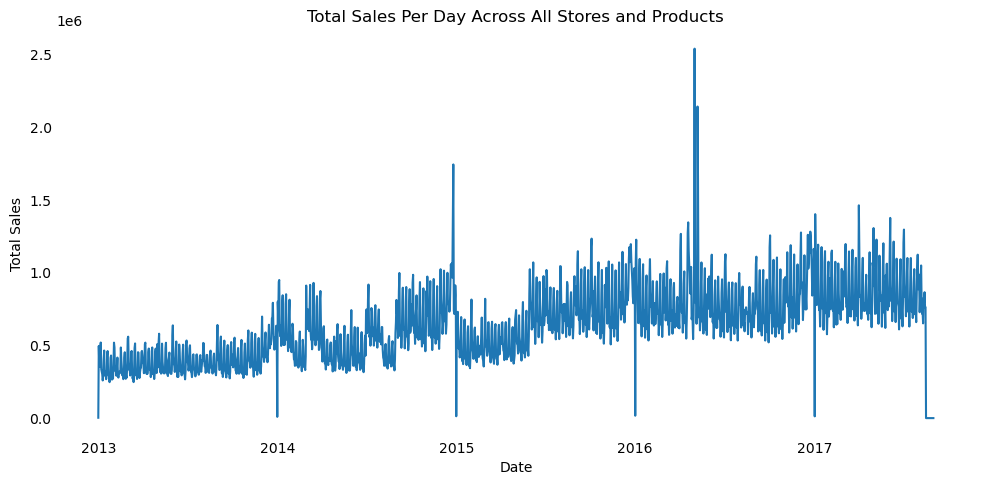

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(df_daily_total_sales['date'], df_daily_total_sales['sales'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Per Day Across All Stores and Products')

plt.tight_layout()
ax = plt.gca()  # get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_tick_params(length=0)  # remove x-axis tick lines
ax.yaxis.set_tick_params(length=0)  # remove y-axis tick lines

plt.show()

Let's split this plot into seperate annual plots.

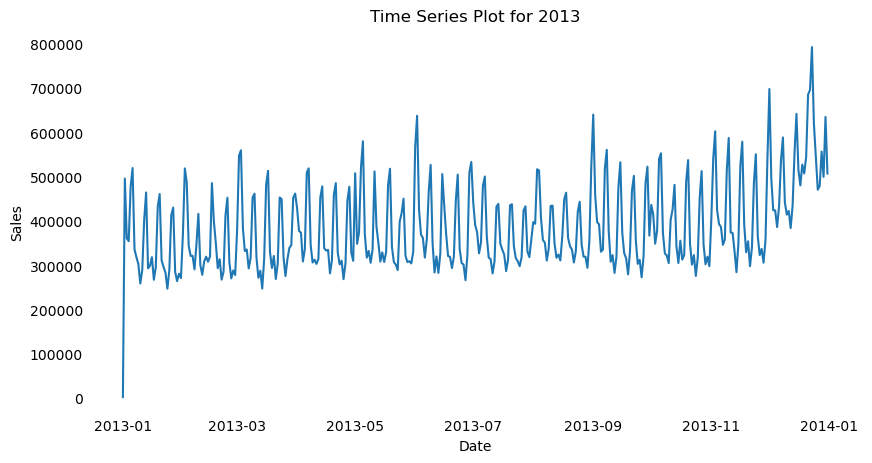

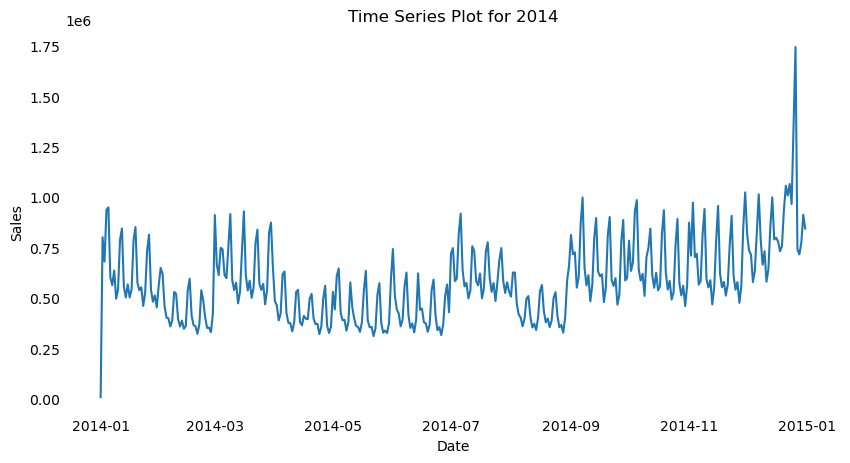

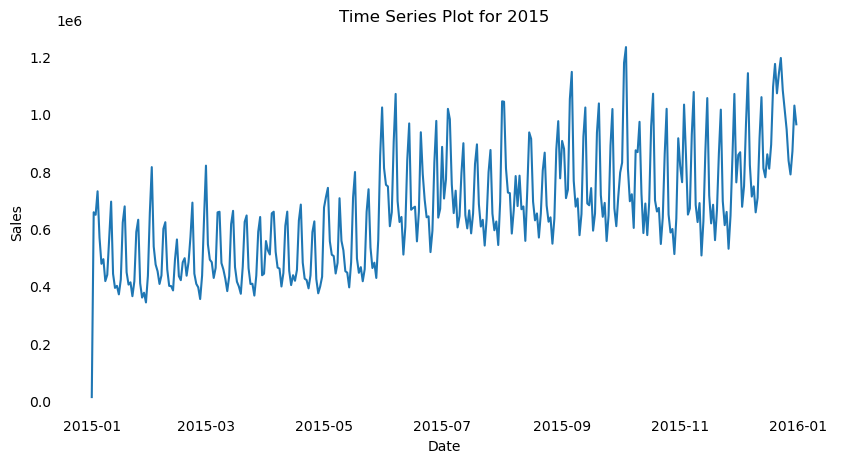

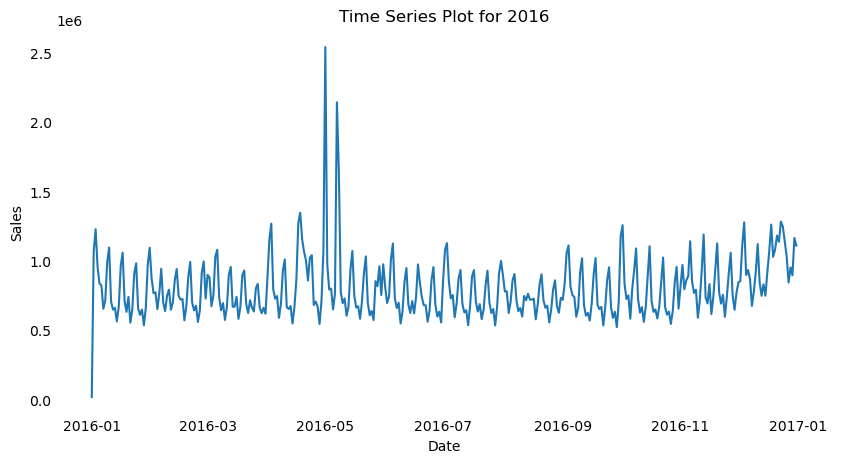

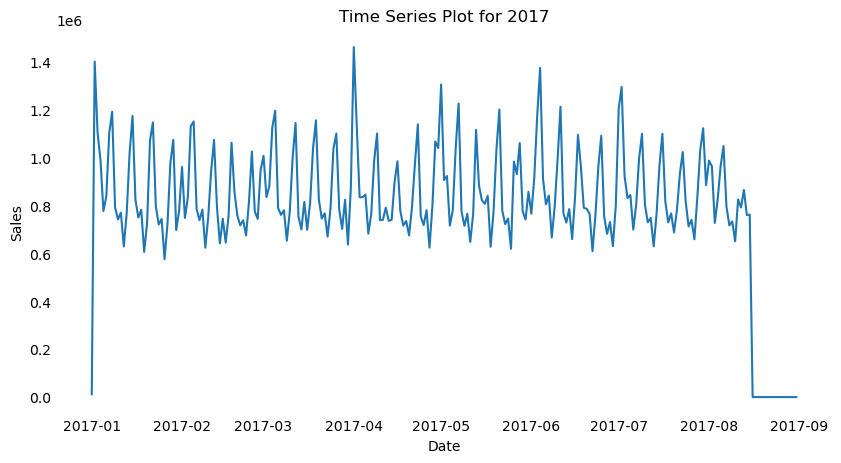

In [29]:
# setting dates as index
df_daily_total_sales.set_index('date', inplace=True)

# extracting unique years from the data
unique_years = df_daily_total_sales.index.year.unique()

for year in unique_years:
    yearly_data = df_daily_total_sales[df_daily_total_sales.index.year == year]
    
    plt.figure(figsize=(10, 5))
    plt.plot(yearly_data.index, yearly_data['sales'], linestyle='-')
    plt.title(f'Time Series Plot for {year}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
  
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.xaxis.set_tick_params(length=0)  
    ax.yaxis.set_tick_params(length=0)

    plt.show()

There is a clearly visible pattern of drops in sales on an annual basis, occurring at the very beginning of the year. We can assume that either shops are closed during the first few days of the year, or customers tend to spend less during that time. This trend is expected. 

We can also observe a clear outlier in Nay 2016. This will require further investigation.

##### Using moving averages

The graph appears very choppy, because it displays daily variation in sales. We need to see long-term trend rather than daily variation. For this purpose, we can use the rolling mean (moving average). The number of days used in moving average calculations is called the rolling window (or moving window).

In order to visually inspect various rolling windows let us compare original graph with 7, 30, 50, 100 and 365 rolling window days.

To improve visual comparison of the graphs, we should remove irrelevant information from the axes and maximize data-ink ratio.

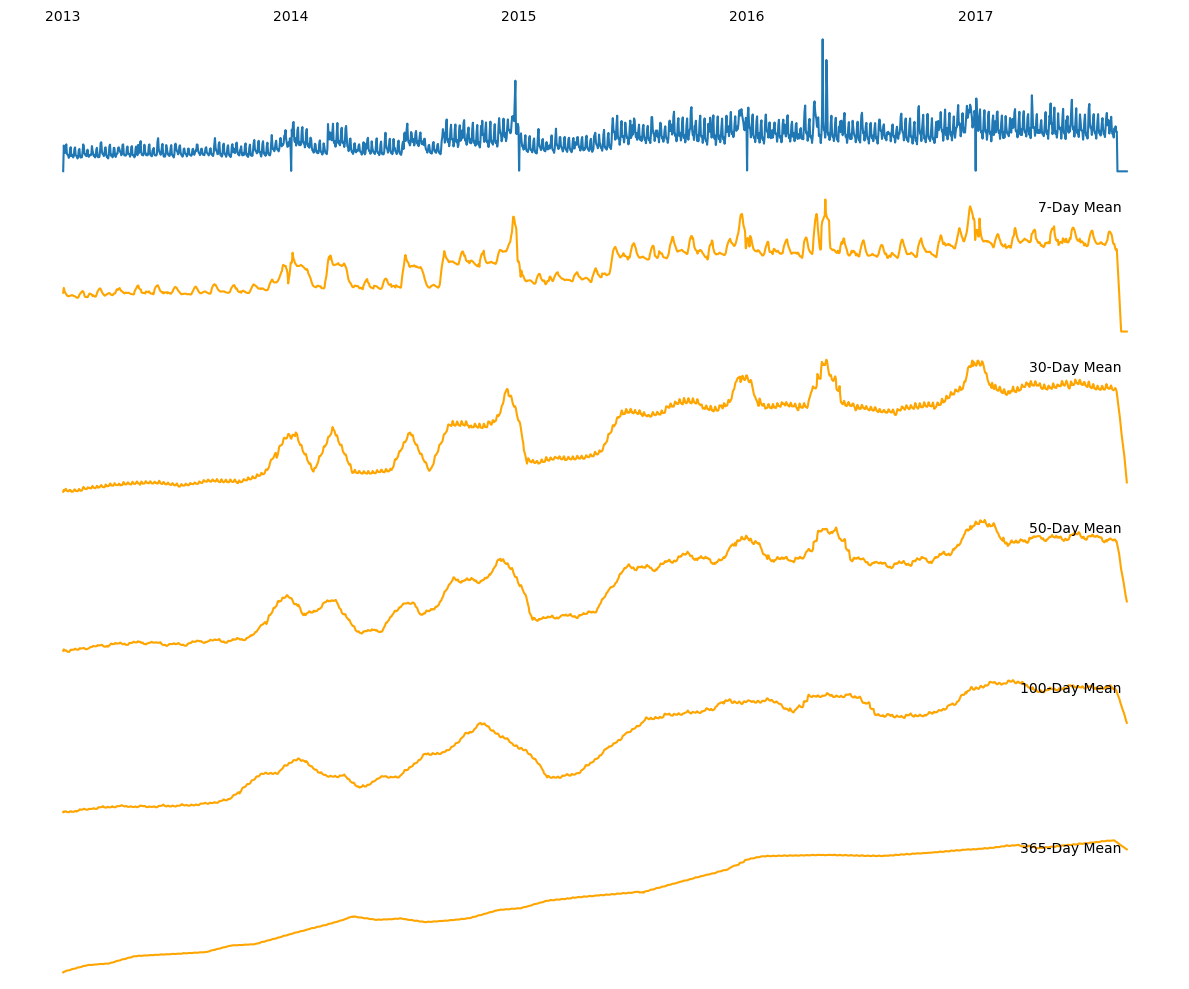

In [30]:
df_daily_total_sales.reset_index(inplace=True)

style.use('default')
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(figsize=(12, 10), nrows=6, ncols=1)

# plot for ax1
ax1.plot(df_daily_total_sales['date'], df_daily_total_sales['sales'])
ax1.set_yticklabels([])
ax1.xaxis.tick_top()  
ax1.tick_params(top=False, left=False)  
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# plot for ax2 to ax6 using a loop
axes = [ax2, ax3, ax4, ax5, ax6]
rolling_means = [7, 30, 50, 100, 365]
for ax, rolling_mean in zip(axes, rolling_means):
    ax.plot(df_daily_total_sales['date'], df_daily_total_sales['sales'].rolling(rolling_mean).mean(), color='orange')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=False, left=False)  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.text(0.95, 0.95, f'{rolling_mean}-Day Mean', transform=ax.transAxes, ha='right', va='top', fontsize=10)

plt.tight_layout()
plt.show()


Based on the above example of mving averages, 50-day mean can be a good visual comparison to a graph. We shall use it from now on. 

##### Aggregating by store

In [31]:
df_aggregated_by_store = df.groupby('store_nbr')['sales'].sum().reset_index()

print("Aggregated Sales Data by Store:")
print(df_aggregated_by_store)

Aggregated Sales Data by Store:
    store_nbr      sales
0           1 14,177,554
1           2 21,628,755
2           3 50,659,604
3           4 18,978,152
4           5 15,647,073
5           6 25,277,365
6           7 27,030,798
7           8 30,602,218
8           9 26,511,718
9          10  9,650,270
10         11 28,431,424
11         12 10,696,161
12         13 10,561,269
13         14 11,426,218
14         15 11,487,625
15         16 11,022,833
16         17 18,104,868
17         18 13,310,450
18         19 13,097,067
19         20 12,990,453
20         21  9,309,059
21         22  4,110,779
22         23 11,689,386
23         24 23,859,667
24         25 11,473,812
25         26  7,784,993
26         27 19,263,396
27         28 18,472,229
28         29  9,784,104
29         30  7,408,825
30         31 17,819,450
31         32  5,973,034
32         33 14,229,517
33         34 17,157,207
34         35  7,702,354
35         36 15,380,774
36         37 20,029,067
37         38 18,9

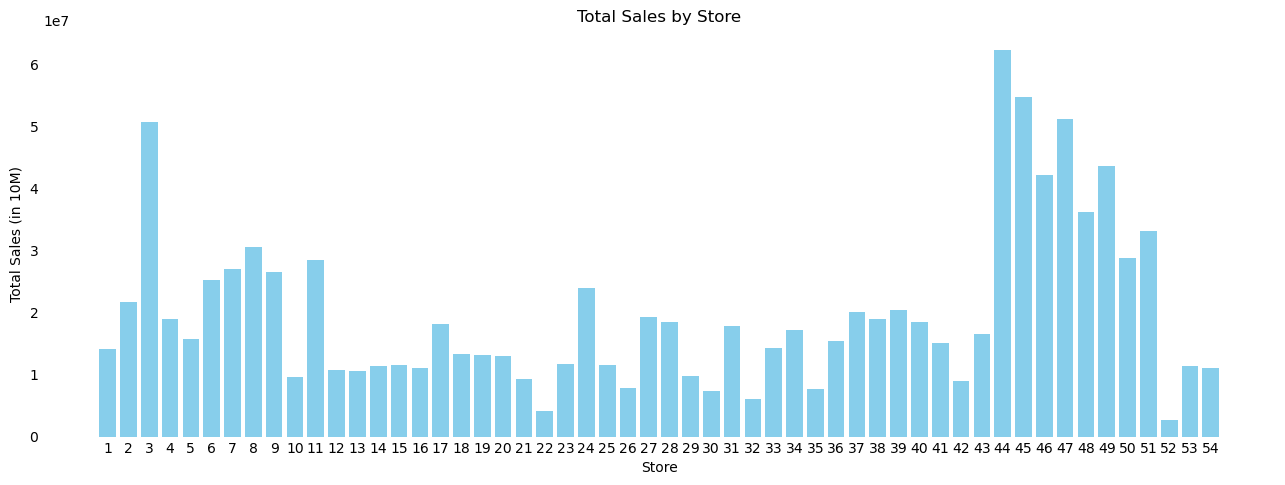

In [32]:
plt.figure(figsize=(13, 5))
plt.bar(df_aggregated_by_store['store_nbr'].astype(str), df_aggregated_by_store['sales'], color='skyblue')
plt.xlabel('Store')
plt.ylabel('Total Sales (in 10M)')
plt.title('Total Sales by Store')

plt.tight_layout()
ax = plt.gca()  # get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_tick_params(length=0)  
ax.yaxis.set_tick_params(length=0)

plt.show()

In [33]:
Q1 = df_aggregated_by_store['sales'].quantile(0.25)
Q3 = df_aggregated_by_store['sales'].quantile(0.75)
IQR = Q3 - Q1

# defining outliers based on IQR
outliers_iqr = df_aggregated_by_store[(df_aggregated_by_store['sales'] < (Q1 - 1.5 * IQR)) | (df_aggregated_by_store['sales'] > (Q3 + 1.5 * IQR))]

print("Outliers identified using IQR:")
print(outliers_iqr)

Outliers identified using IQR:
    store_nbr      sales
2           3 50,659,604
43         44 62,311,894
44         45 54,708,150
46         47 51,151,160


All outlier stores are located in Quito, which logically suggests aggregating data by city.

##### Aggregating by city

In [34]:
df_aggregated_by_city = df.groupby('city')['sales'].sum().reset_index()

print("Aggregated Sales Data by City:")
print(df_aggregated_by_city)

Aggregated Sales Data by City:
             city       sales
0          ambato  40,454,309
1        babahoyo  17,819,450
2         cayambe  28,431,424
3          cuenca  49,347,865
4           daule  19,263,396
5       el_carmen  11,097,942
6      esmeraldas  16,446,543
7        guaranda  13,097,067
8       guayaquil 123,490,493
9          ibarra  11,487,625
10      latacunga  21,257,430
11       libertad  15,380,774
12           loja  18,932,492
13        machala  33,508,485
14          manta  13,987,924
15         playas   7,702,354
16           puyo   4,110,779
17        quevedo  14,229,517
18          quito 558,834,489
19       riobamba  11,426,218
20        salinas  11,473,812
21  santo_domingo  35,978,966


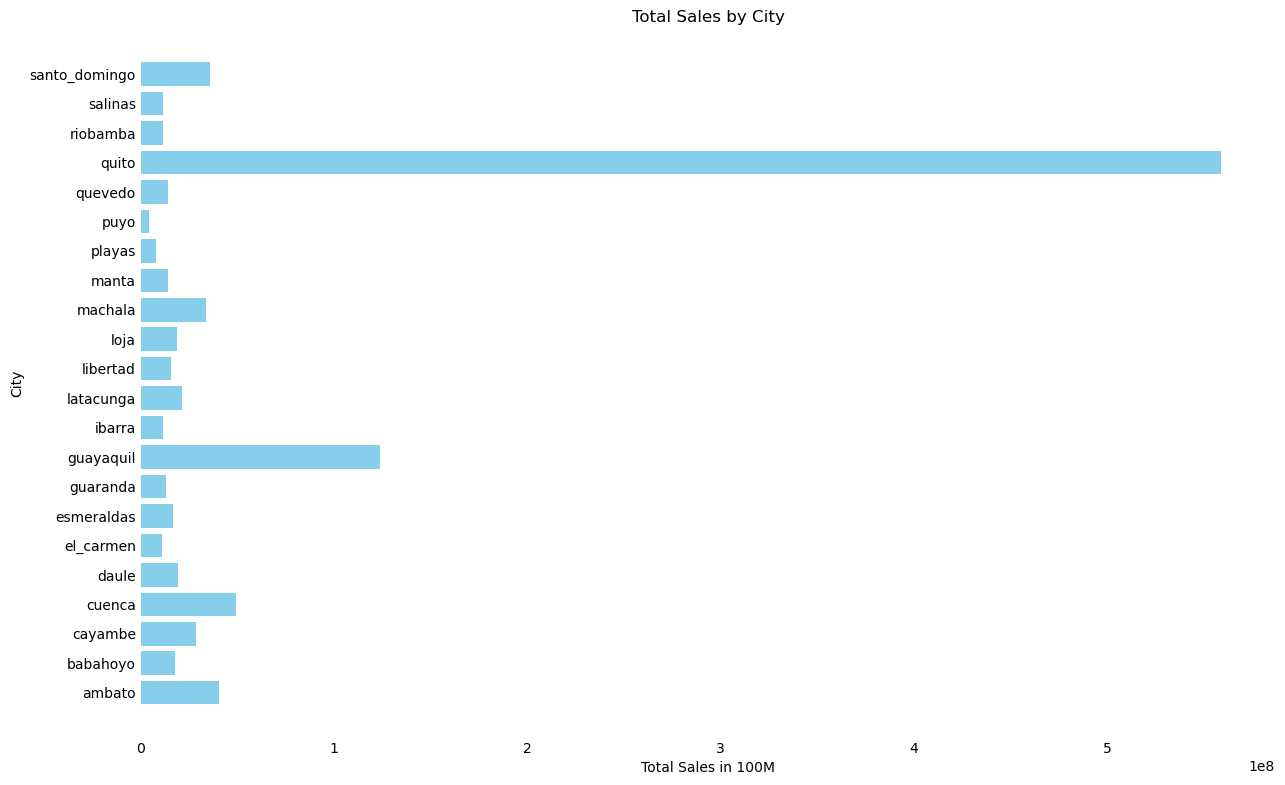

In [35]:
plt.figure(figsize=(13, 8))
plt.barh(df_aggregated_by_city['city'].astype(str), df_aggregated_by_city['sales'], color='skyblue')
plt.xlabel('Total Sales in 100M')
plt.ylabel('City')
plt.title('Total Sales by City')

plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_tick_params(length=0)  
ax.yaxis.set_tick_params(length=0)

plt.show()

There is clear evidence that Quito is the top-selling city, with second being Guayaquil. Let's calculate their proportions relative to the total sales.

In [36]:
quito_sales = df_aggregated_by_city[df_aggregated_by_city['city'] == 'quito']['sales'].sum()
guayaquil_sales = df_aggregated_by_city[df_aggregated_by_city['city'] == 'guayaquil']['sales'].sum()

total_sales = df_aggregated_by_city['sales'].sum()

proportion_quito_sales = quito_sales / total_sales
proportion_guayaquil_sales = guayaquil_sales / total_sales

print(f"Proportion of sales from Quito: {proportion_quito_sales:.2%}")
print(f"Proportion of sales from Guayaquil: {proportion_guayaquil_sales:.2%}")

Proportion of sales from Quito: 51.85%
Proportion of sales from Guayaquil: 11.46%


##### Aggregating by product

In [37]:
df_aggregated_by_product = df.groupby('family')['sales'].sum().reset_index()

print("Aggregated Sales Data by Product:")
print(df_aggregated_by_product)

Aggregated Sales Data by Product:
                        family       sales
0                   automotive     556,906
1                    baby_care      10,134
2                       beauty     339,442
3                    beverages 217,872,197
4                        books       6,438
5                 bread/bakery  42,277,830
6                  celebration     764,395
7                     cleaning  97,851,737
8                        dairy  64,735,307
9                         deli  24,194,517
10                        eggs  15,638,862
11                frozen_foods  14,129,790
12                   grocery_i 344,685,389
13                  grocery_ii   1,970,014
14                    hardware     103,804
15          home_and_kitchen_i   1,870,270
16         home_and_kitchen_ii   1,527,916
17             home_appliances      41,800
18                   home_care  16,106,110
19                  ladieswear     655,438
20             lawn_and_garden     550,787
21                  

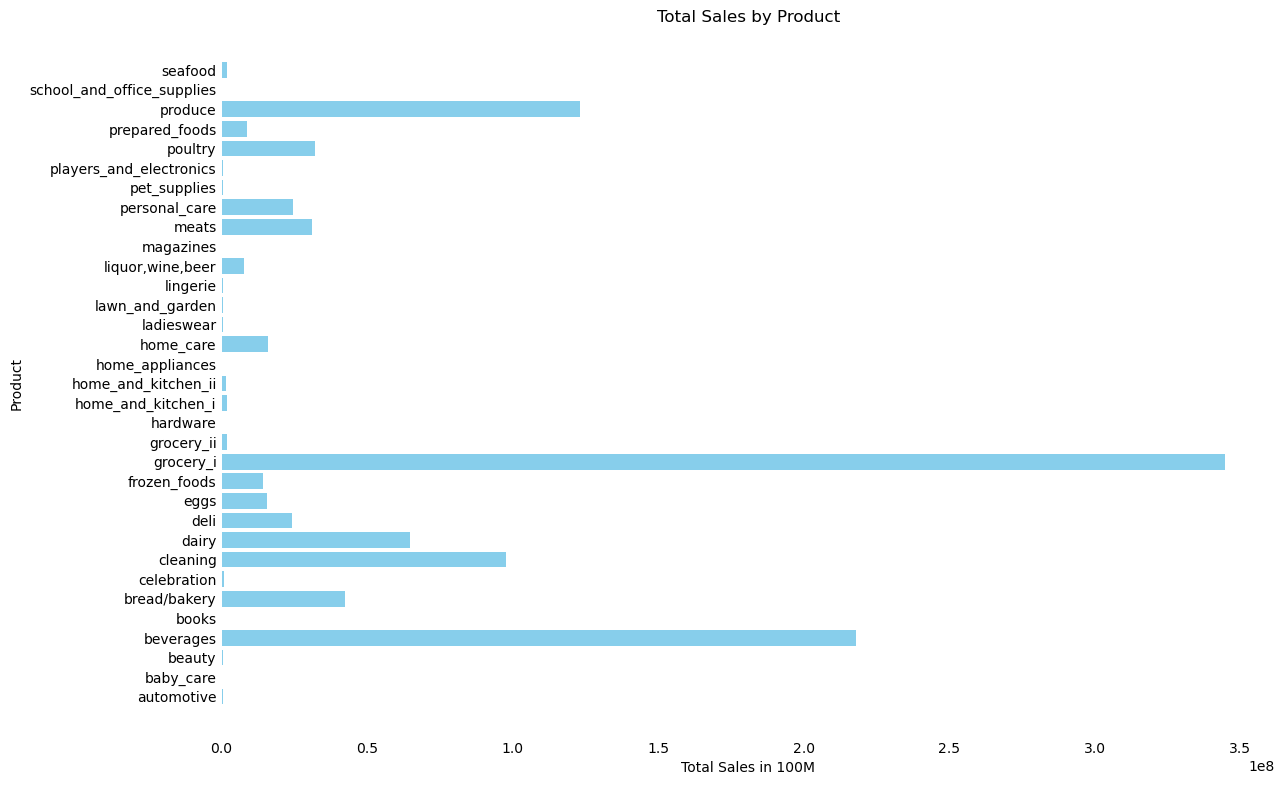

In [38]:
plt.figure(figsize=(13, 8))
plt.barh(df_aggregated_by_product['family'].astype(str), df_aggregated_by_product['sales'], color='skyblue')
plt.xlabel('Total Sales in 100M')
plt.ylabel('Product')
plt.title('Total Sales by Product')

plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_tick_params(length=0)  
ax.yaxis.set_tick_params(length=0)

plt.show()

In [39]:
total_sales = df_aggregated_by_product['sales'].sum()

grocery_sales = df_aggregated_by_product[df_aggregated_by_product['family'] == 'grocery_i']['sales'].sum()
beverages_sales = df_aggregated_by_product[df_aggregated_by_product['family'] == 'beverages']['sales'].sum()
produce_sales = df_aggregated_by_product[df_aggregated_by_product['family'] == 'produce']['sales'].sum()

proportion_grocery_sales = grocery_sales / total_sales
proportion_beverages_sales = beverages_sales / total_sales
proportion_produce_sales = produce_sales / total_sales

print(f"Proportion of grocery_i sales: {proportion_grocery_sales:.2%}")
print(f"Proportion of beverages sales: {proportion_beverages_sales:.2%}")
print(f"Proportion of produce sales: {proportion_produce_sales:.2%}")

Proportion of grocery_i sales: 31.98%
Proportion of beverages sales: 20.22%
Proportion of produce sales: 11.44%


In [40]:
quito_grocery_i_sales = df[(df['city'] == 'quito') & (df['family'] == 'grocery_i')]['sales'].sum()
total_sales = df['sales'].sum()

# calculating the proportion of 'grocery_i' sales from Quito stores
proportion_quito_grocery_i_sales = quito_grocery_i_sales / total_sales

print(f"Proportion of grocery_i sales from Quito to total sales: {proportion_quito_grocery_i_sales:.2%}")

Proportion of grocery_i sales from Quito to total sales: 15.58%


##### Aggregate by store type

In [41]:
df_aggregated_by_store_type = df.groupby('type')['sales'].sum().reset_index()

print("Aggregated Sales Data by Store Type:")
print(df_aggregated_by_store_type)

Aggregated Sales Data by Store Type:
  type       sales
0    A 354,423,812
1    B 145,857,098
2    C 165,028,457
3    D 352,366,339
4    E  60,083,649


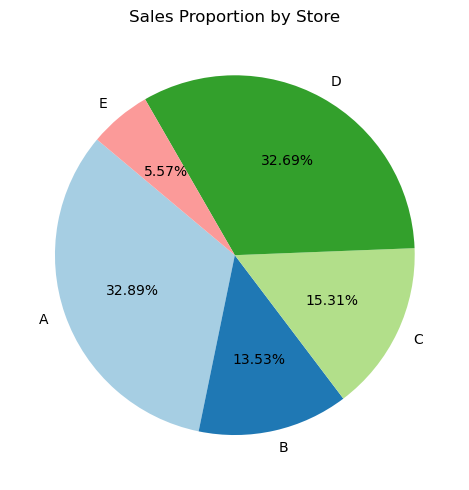

In [42]:
plt.figure(figsize=(5, 5))
plt.pie(
    df_aggregated_by_store_type['sales'],
    labels=df_aggregated_by_store_type['type'].astype(str),
    autopct='%.2f%%',  # displaying percentage values on the pie slices
    startangle=140,    
    colors=plt.cm.Paired.colors 
)
plt.title('Sales Proportion by Store')
plt.tight_layout()
plt.show()

No clear outlier is visible

##### Aggregate by cluster

In [43]:
df_aggregated_by_store_cluster = df.groupby('cluster')['sales'].sum().reset_index()

print("Aggregated Sales Data by Store Cluster:")
print(df_aggregated_by_store_cluster)

Aggregated Sales Data by Store Cluster:
    cluster       sales
0         1  54,596,875
1         2  29,020,527
2         3  75,894,199
3         4  49,628,357
4         5  62,311,894
5         6 114,727,199
6         7  15,536,997
7         8 108,292,620
8         9  30,667,539
9        10  85,688,091
10       11 100,987,500
11       12  18,104,868
12       13  72,375,428
13       14 158,073,984
14       15  55,492,393
15       16  13,310,450
16       17  33,050,435


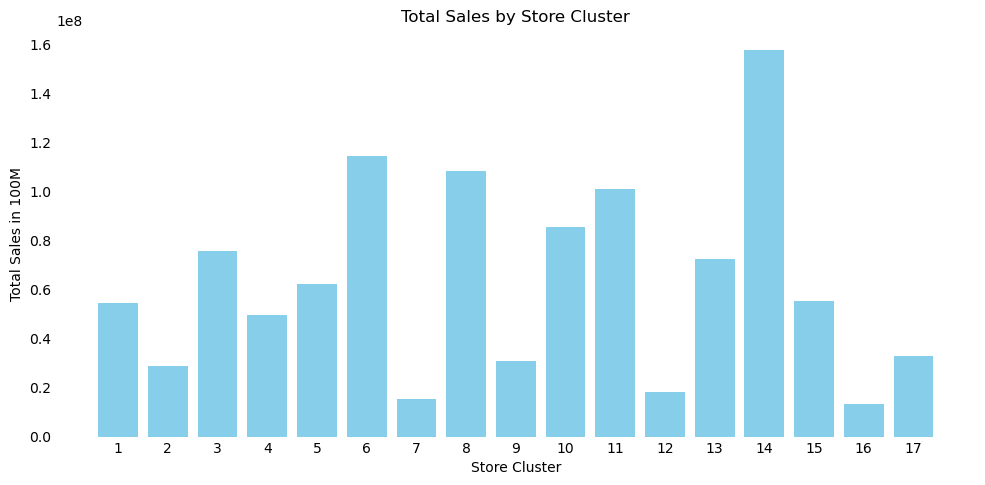

In [44]:
plt.figure(figsize=(10, 5))
plt.bar(df_aggregated_by_store_cluster['cluster'].astype(str), df_aggregated_by_store_cluster['sales'], color='skyblue')
plt.xlabel('Store Cluster')
plt.ylabel('Total Sales in 100M')
plt.title('Total Sales by Store Cluster')

plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_tick_params(length=0)  
ax.yaxis.set_tick_params(length=0)

plt.show()

The outliers are not visually distinguishable. Let's calculate them instead.

In [45]:
Q1 = df_aggregated_by_store_cluster['sales'].quantile(0.25)
Q3 = df_aggregated_by_store_cluster['sales'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr_store_cluster = df_aggregated_by_store_cluster[(df_aggregated_by_store_cluster['sales'] < (Q1 - 1.5 * IQR)) | (df_aggregated_by_store_cluster['sales'] > (Q3 + 1.5 * IQR))]

print("Outliers identified using IQR:")
print(outliers_iqr_store_cluster)

Outliers identified using IQR:
Empty DataFrame
Columns: [cluster, sales]
Index: []


No outliers are present. 

### Dealing with outliers <a id="outliers"></a>

Let's use describe() to get a quick overview of potential outliers.

In [46]:
df.describe()

,store_nbr,sales,onpromotion,cluster,oil_price,transactions,year,month,day,weekday
count,"3,036,792","3,008,280","3,036,792","3,036,792","3,036,792","3,036,792","3,036,792","3,036,792","3,036,792","3,036,792"
mean,28,358,3,8,68,"1,542","2,015",6,16,3
std,16,"1,103",12,5,26,"1,040",1,3,9,2
min,1,0,0,1,26,0,"2,013",1,1,0
25%,14,0,0,4,46,916,"2,014",3,8,1
50%,28,11,0,8,53,"1,325","2,015",6,16,3
75%,41,196,0,13,96,"1,967","2,016",9,23,5
max,54,"124,717",741,17,111,"8,359","2,017",12,31,6


There are obvious outliers in 'sales' and 'onpromotion' columns as distrubutions between quartiles are disproportionate. Let's look at 'sales' column first. We can use visual methods such as boxplot and Kernel Density Estimate (KDE) plot so look for outliers. 

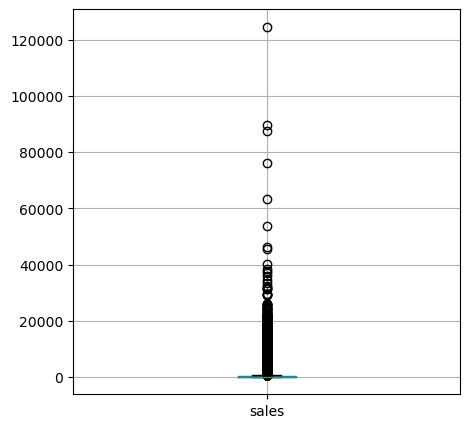

In [47]:
df.boxplot(column=['sales'],figsize=(5, 5))
plt.show()

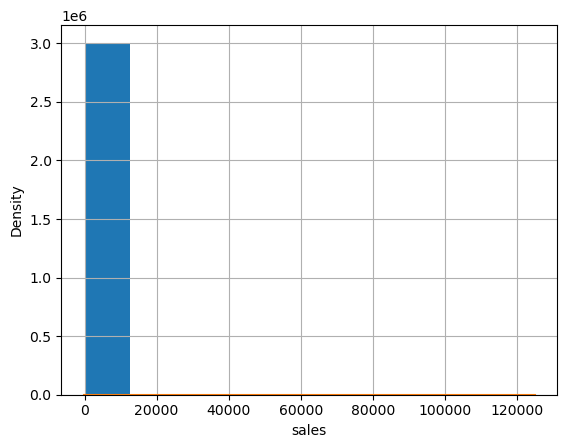

In [48]:
df['sales'].hist()

# generating Kernel Density Estimate (KDE) plot
sns.kdeplot(df['sales'])
plt.show()

Let's check Inter Quartile Range (IQR)

In [49]:
# calculating Q1, Q3, and IQR
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

# defining lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Upper bound is: {upper_bound:.2f}")

outliers_above_upper_bound = df[df['sales'] > upper_bound]

if not outliers_above_upper_bound.empty:
    highest_non_outlier = df[df['sales'] <= upper_bound]['sales'].max()
    print(f"All outliers lie above: {highest_non_outlier}")
    print(f"Number of outliers above this threshold: {outliers_above_upper_bound.shape[0]}")
else:
    print("No outliers above the upper bound.")

percentage_of_outliers = len(outliers_above_upper_bound)/ len(df['sales'])*100
print(f"Percentage of outliers: {percentage_of_outliers:.2f}%")

Upper bound is: 490.00
All outliers lie above: 490.0
Number of outliers above this threshold: 448173
Percentage of outliers: 14.76%


Let's apply a threshold to compare visual results between box plots.

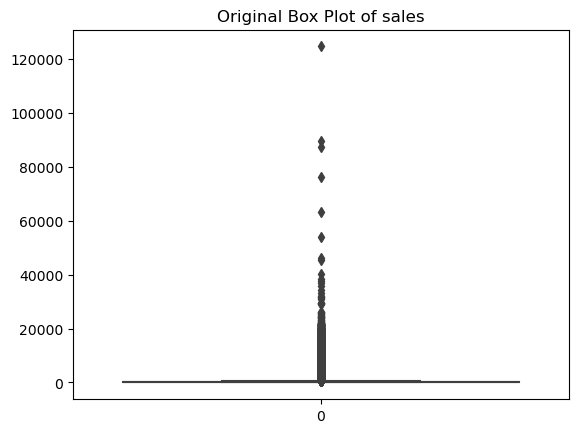

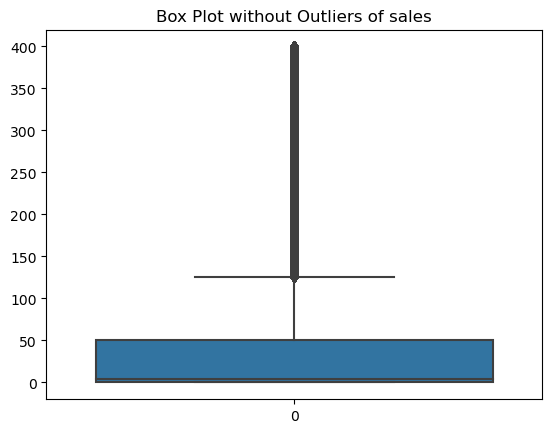

In [50]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 400
no_outliers = removal_box_plot(df, 'sales', threshold_value)

Now let's visualise sales pattern over time.

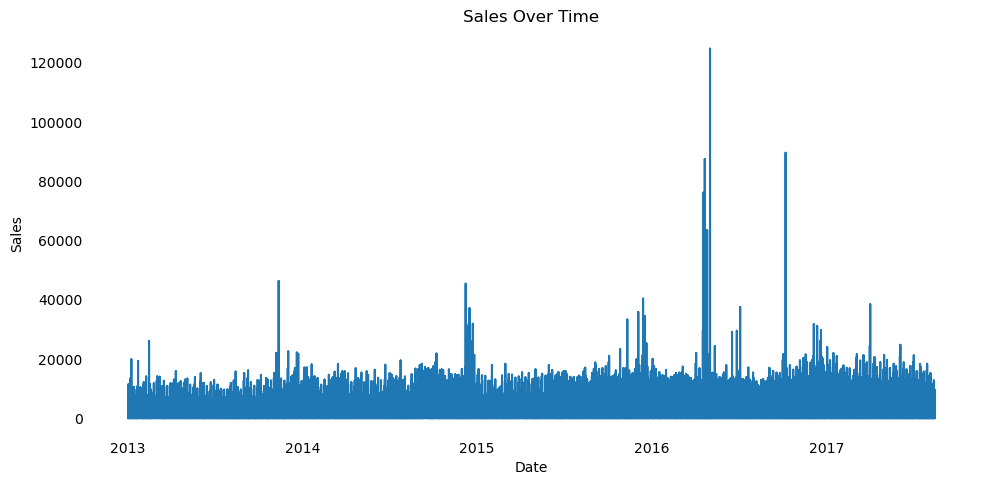

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_tick_params(length=0)  
ax.yaxis.set_tick_params(length=0)  

plt.show()

We can split the plot by years in order to better see the graphs.

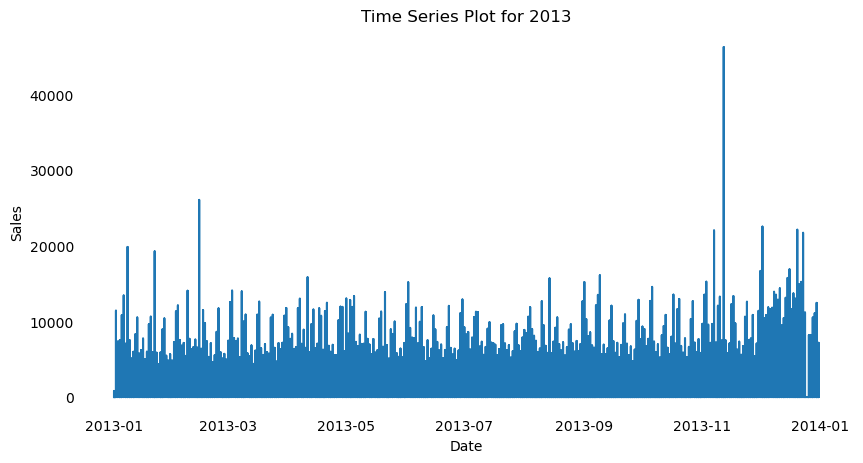

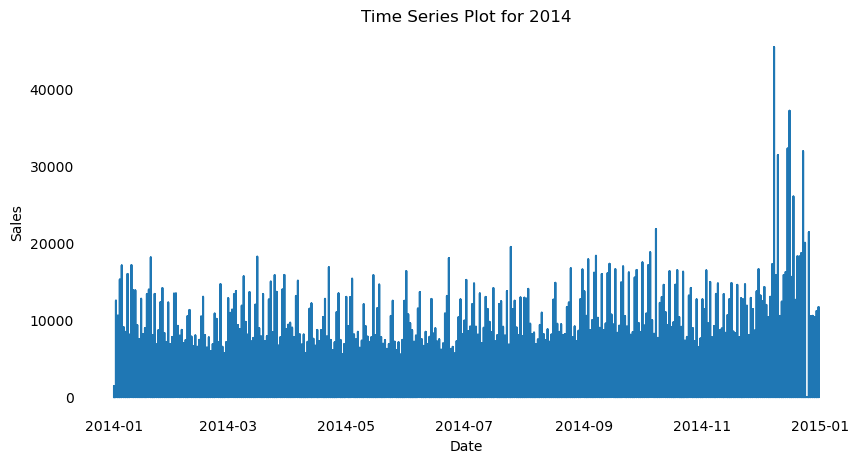

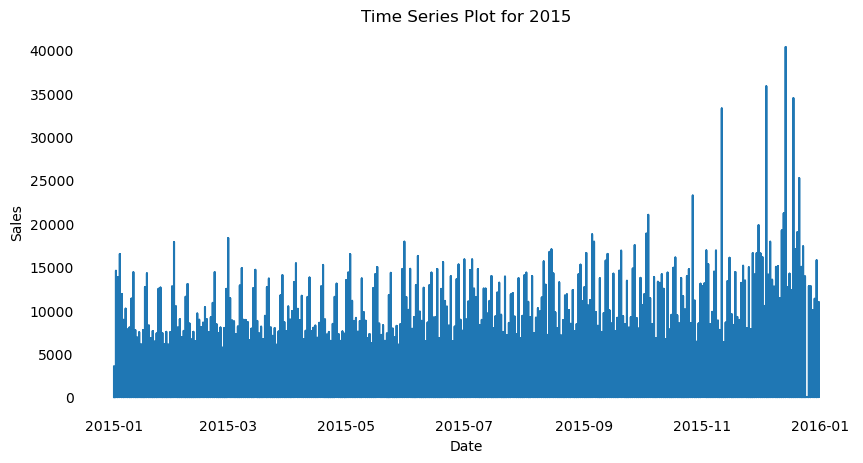

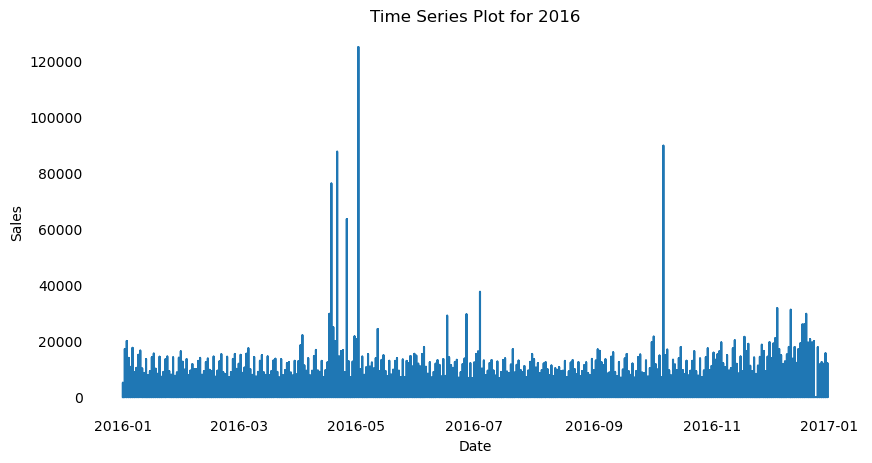

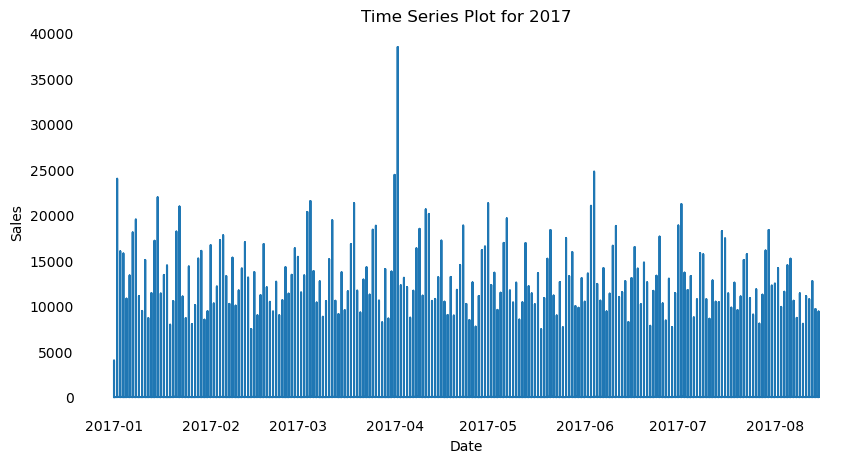

In [52]:
# extracting unique years from the data
unique_years = df.index.year.unique()

for year in unique_years:
    yearly_data = df[df.index.year == year]
    
    plt.figure(figsize=(10, 5))
    plt.plot(yearly_data.index, yearly_data['sales'], linestyle='-')
    plt.title(f'Time Series Plot for {year}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
  
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.xaxis.set_tick_params(length=0)  
    ax.yaxis.set_tick_params(length=0)

    plt.show()


We can visually identify a significant outlier around April to May 2016. Let’s filter the data for this period to analyze it further.

In [53]:
# filtering data for the period
filtered_df = df.loc['2016-04-01':'2016-05-31']

# verifying results
filtered_df.head()

,store_nbr,family,sales,onpromotion,city,state,type,cluster,oil_price,transactions,national_holiday,events,state_holiday,city_holiday,year,month,day,weekday
date,,,,,,,,,,,,,,,,,,
2016-04-01,1,automotive,8,0,quito,pichincha,D,13,35,"1,797",False,False,False,False,2016,4,1,4
2016-04-01,1,baby_care,0,0,quito,pichincha,D,13,35,"1,797",False,False,False,False,2016,4,1,4
2016-04-01,1,beauty,2,0,quito,pichincha,D,13,35,"1,797",False,False,False,False,2016,4,1,4
2016-04-01,1,beverages,"2,274",8,quito,pichincha,D,13,35,"1,797",False,False,False,False,2016,4,1,4
2016-04-01,1,books,0,0,quito,pichincha,D,13,35,"1,797",False,False,False,False,2016,4,1,4


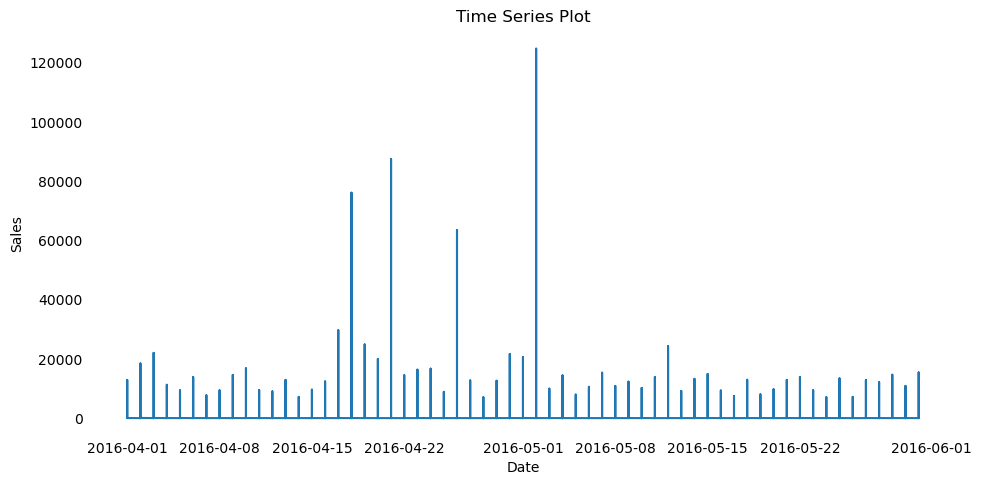

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(filtered_df.index, filtered_df['sales'])
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_tick_params(length=0)  
ax.yaxis.set_tick_params(length=0)  

plt.show()

Let's see if any event caused the spike in sales and compare the trends on the plot line below.

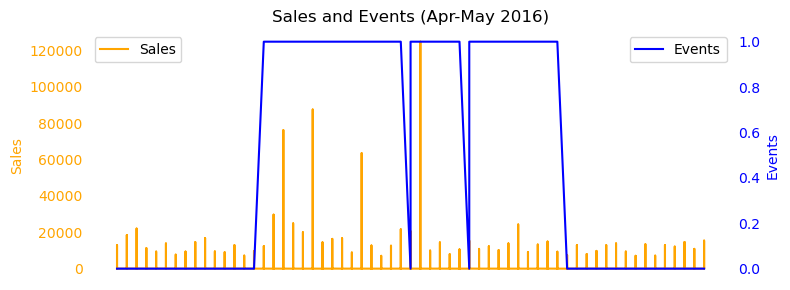

In [55]:
fig, ax1 = plt.subplots(figsize=(8, 3))

# plotting the first dataset on the left y-axis
ax1.plot(filtered_df.index, filtered_df['sales'], label='Sales', color='orange')
ax1.set_ylabel('Sales', color='orange')
ax1.tick_params(axis='y', colors='orange')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.xaxis.set_major_locator(mdates.YearLocator())  # Show ticks at yearly intervals
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_tick_params(length=0)
ax1.yaxis.set_tick_params(length=0)
ax1.legend(loc='upper left')

# creating a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(filtered_df.index, filtered_df['events'], label='Events', color='blue')
ax2.set_ylabel('Events', color='blue')
ax2.tick_params(axis='y', colors='blue')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.xaxis.set_tick_params(length=0)
ax2.yaxis.set_tick_params(length=0)
ax2.legend(loc='upper right')

plt.title('Sales and Events (Apr-May 2016)')

plt.tight_layout()
plt.show()


There is clear visual evidence that the increase in sales coincides with a major event, which was an earthquake in Manabí province.

Let's check if any particular product type was more popular during this period.

In [56]:
df_aggregated_by_product_2016 = filtered_df.groupby('family')['sales'].sum().reset_index()

print("Aggregated Sales Data by Product in Apr-May 2016:")
print(df_aggregated_by_product)

Aggregated Sales Data by Product in Apr-May 2016:
                        family       sales
0                   automotive     556,906
1                    baby_care      10,134
2                       beauty     339,442
3                    beverages 217,872,197
4                        books       6,438
5                 bread/bakery  42,277,830
6                  celebration     764,395
7                     cleaning  97,851,737
8                        dairy  64,735,307
9                         deli  24,194,517
10                        eggs  15,638,862
11                frozen_foods  14,129,790
12                   grocery_i 344,685,389
13                  grocery_ii   1,970,014
14                    hardware     103,804
15          home_and_kitchen_i   1,870,270
16         home_and_kitchen_ii   1,527,916
17             home_appliances      41,800
18                   home_care  16,106,110
19                  ladieswear     655,438
20             lawn_and_garden     550,787
21  

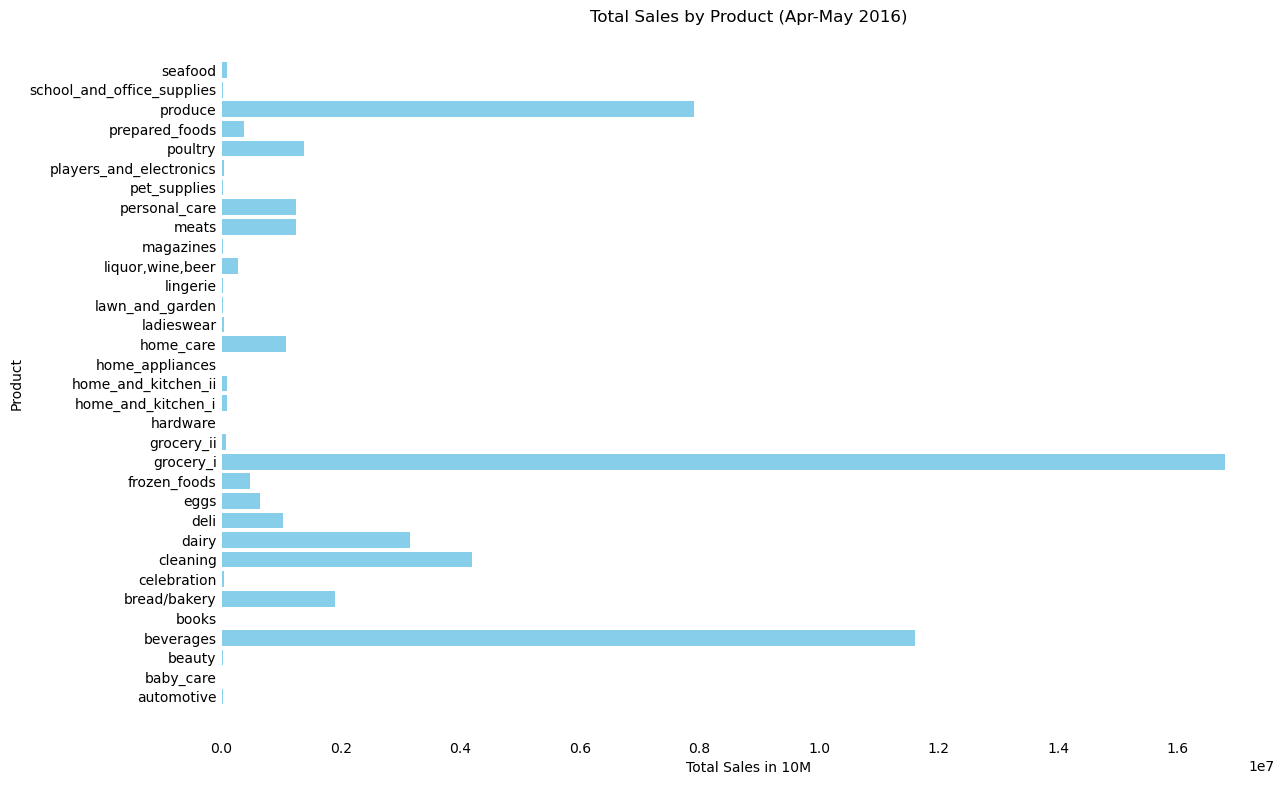

In [57]:
plt.figure(figsize=(13, 8))
plt.barh(df_aggregated_by_product_2016['family'].astype(str), df_aggregated_by_product_2016['sales'], color='skyblue')
plt.xlabel('Total Sales in 10M')
plt.ylabel('Product')
plt.title('Total Sales by Product (Apr-May 2016)')

plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_tick_params(length=0)  
ax.yaxis.set_tick_params(length=0)

plt.show()

In [58]:
total_sales = df_aggregated_by_product_2016['sales'].sum()

grocery_sales = df_aggregated_by_product_2016[df_aggregated_by_product_2016['family'] == 'grocery_i']['sales'].sum()
beverages_sales = df_aggregated_by_product_2016[df_aggregated_by_product_2016['family'] == 'beverages']['sales'].sum()
produce_sales = df_aggregated_by_product_2016[df_aggregated_by_product_2016['family'] == 'produce']['sales'].sum()

proportion_grocery_sales = grocery_sales / total_sales
proportion_beverages_sales = beverages_sales / total_sales
proportion_produce_sales = produce_sales / total_sales

print(f"Proportion of grocery_i sales: {proportion_grocery_sales:.2%}")
print(f"Proportion of beverages sales: {proportion_beverages_sales:.2%}")
print(f"Proportion of produce sales: {proportion_produce_sales:.2%}")

Proportion of grocery_i sales: 31.15%
Proportion of beverages sales: 21.52%
Proportion of produce sales: 14.65%


The result aligns with the overall sales trends, where grocery, beverages, and produce are the most popular categories. Therefore, no specific product type stands out during this period.


Let’s check if the sales in a specific city were higher than expected.

In [59]:
df_aggregated_by_city_2016 = filtered_df.groupby('city')['sales'].sum().reset_index()

print("Aggregated Sales Data by City in Apr-May 2016:")
print(df_aggregated_by_city_2016)

Aggregated Sales Data by City in Apr-May 2016:
             city      sales
0          ambato  1,813,294
1        babahoyo    851,174
2         cayambe  1,306,782
3          cuenca  2,664,205
4           daule    989,179
5       el_carmen    548,500
6      esmeraldas    696,292
7        guaranda    626,195
8       guayaquil  6,250,062
9          ibarra    539,694
10      latacunga  1,006,137
11       libertad    787,055
12           loja    800,292
13        machala  1,612,296
14          manta    962,713
15         playas    356,326
16           puyo    384,915
17        quevedo    630,699
18          quito 28,235,009
19       riobamba    518,857
20        salinas    468,321
21  santo_domingo  1,856,601


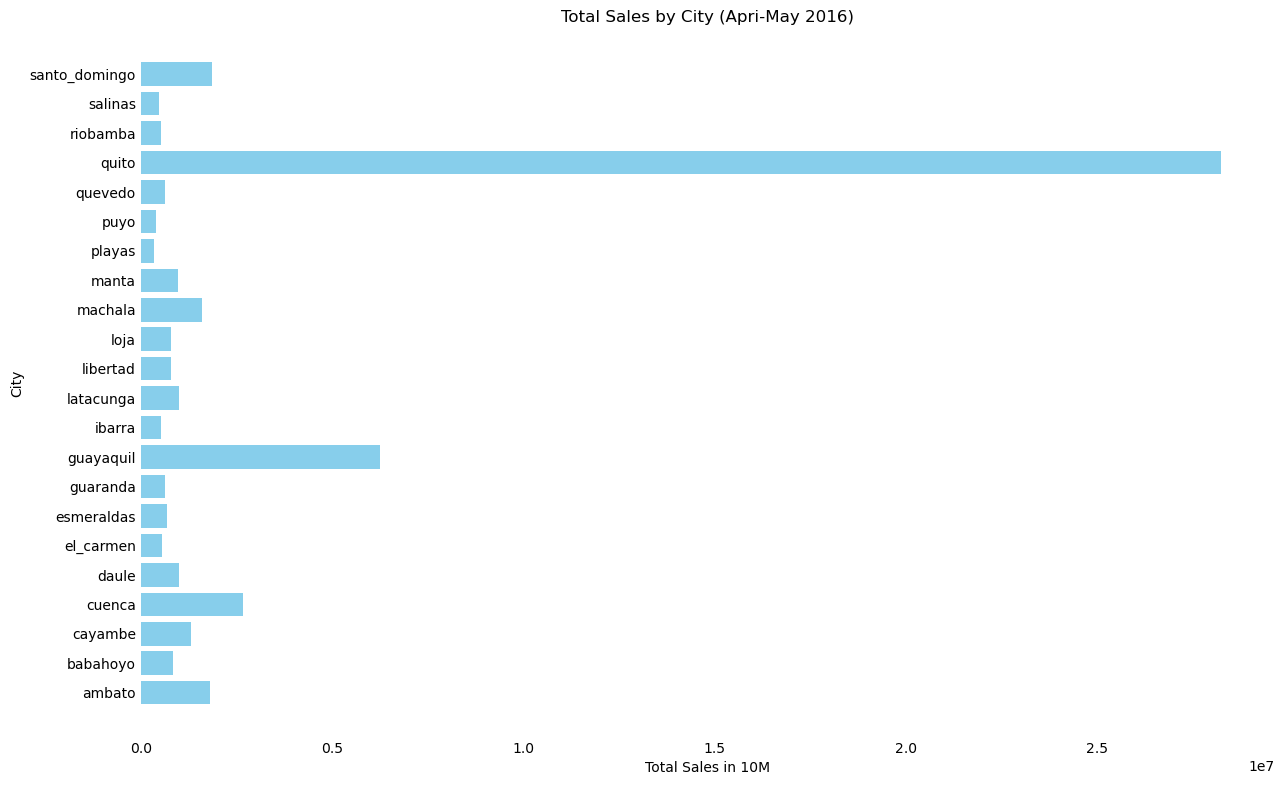

In [60]:
plt.figure(figsize=(13, 8))
plt.barh(df_aggregated_by_city_2016['city'].astype(str), df_aggregated_by_city_2016['sales'], color='skyblue')
plt.xlabel('Total Sales in 10M')
plt.ylabel('City')
plt.title('Total Sales by City (Apri-May 2016)')

plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_tick_params(length=0)  
ax.yaxis.set_tick_params(length=0)

plt.show()

In [61]:
quito_sales_2016 = df_aggregated_by_city_2016[df_aggregated_by_city_2016['city'] == 'quito']['sales'].sum()
guayaquil_sales_2016 = df_aggregated_by_city_2016[df_aggregated_by_city['city'] == 'guayaquil']['sales'].sum()

total_sales_2016 = df_aggregated_by_city_2016['sales'].sum()

proportion_quito_sales_2016 = quito_sales_2016 / total_sales_2016
proportion_guayaquil_sales_2016 = guayaquil_sales_2016 / total_sales_2016

print(f"Proportion of sales from Quito: {proportion_quito_sales_2016:.2%}")
print(f"Proportion of sales from Guayaquil: {proportion_guayaquil_sales_2016:.2%}")

Proportion of sales from Quito: 52.38%
Proportion of sales from Guayaquil: 11.59%


Again Quito and Guayaquil are dominant, thus no anomalies here.

Next step should be removing or adjusting outliers,  if they result from non-recurring, exceptional events or if our model focuses on regular sales behavior. Keeping these outliers can mislead the model and make it predict sales incorrectly in normal situations. By adjusting them, the model can learn better from regular sales patterns and give more accurate predictions. 

In this case, we will use the Capping (Winsorizing) approach, where we limit extreme outliers to a specific threshold. The threshold will be determined based on the same period from the previous year.

Let's find the exact date range of the spike.

In [62]:
upper_threshold = 20000  

outlier_dates = filtered_df[filtered_df['sales'] > upper_threshold].index
outlier_min = outlier_dates.min()
outlier_max = outlier_dates.max()

print("Outliers detected between these dates:")
print(outlier_min, "to", outlier_max)

Outliers detected between these dates:
2016-04-03 00:00:00 to 2016-05-12 00:00:00


The outliers lie between 2016-04-03 and 2016-05-12. We will limit the outliers within this range. 

Now let's find the sales range for the same period in previous year.

In [63]:
filtered_df_2015 = df.loc['2015-04-03':'2015-05-12']

In [64]:
filtered_df_2015 = filtered_df_2015.reset_index()

Let's visualize the sales range for the same period in 2015.

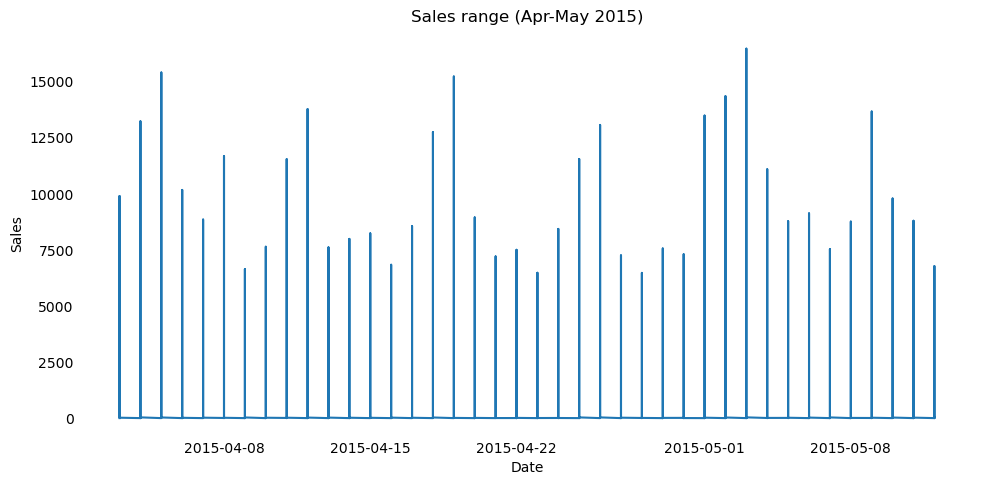

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(filtered_df_2015['date'], filtered_df_2015['sales'])
plt.title('Sales range (Apr-May 2015)')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_tick_params(length=0)  
ax.yaxis.set_tick_params(length=0)  

plt.show()

In [66]:
# calculating Q1, Q3, and IQR
Q1 = filtered_df['sales'].quantile(0.25)
Q3 = filtered_df['sales'].quantile(0.75)
IQR = Q3 - Q1

# defining lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Upper bound is: {upper_bound:.2f}")
print(f"Lower bound is: {lower_bound:.2f}")

# checking for outliers above the upper bound
outliers_above_upper_bound = filtered_df[filtered_df['sales'] > upper_bound]

if not outliers_above_upper_bound.empty:
    highest_non_outlier = filtered_df[filtered_df['sales'] <= upper_bound]['sales'].max()
    print(f"All outliers lie above: {highest_non_outlier}")
    print(f"Number of outliers above this threshold: {outliers_above_upper_bound.shape[0]}")
else:
    print("No outliers above the upper bound.")

percentage_of_outliers = len(outliers_above_upper_bound)/ len(filtered_df['sales'])*100
print(f"Percentage of outliers: {percentage_of_outliers:.2f}%")

Upper bound is: 667.45
Lower bound is: -397.27
All outliers lie above: 667.281
Number of outliers above this threshold: 16860
Percentage of outliers: 14.78%


Let's select the threshold just above 15000 as per plot above

In [67]:
threshold = 17500

# applying the capping only within the defined time range
df.loc[(df.index >= outlier_min) & (df.index <= outlier_max) & (df['sales'] > threshold), 'sales'] = threshold

In [68]:
filtered_df = filtered_df.reset_index()

Let's verify results by potting the graph

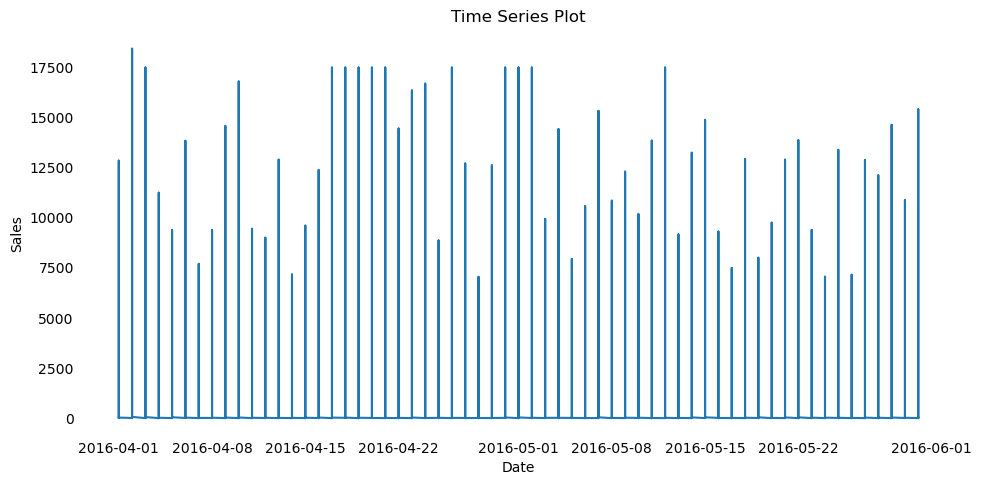

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(filtered_df['date'], filtered_df['sales'])
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_tick_params(length=0)  
ax.yaxis.set_tick_params(length=0)  

plt.show()

In [70]:
df.reset_index(inplace=True)

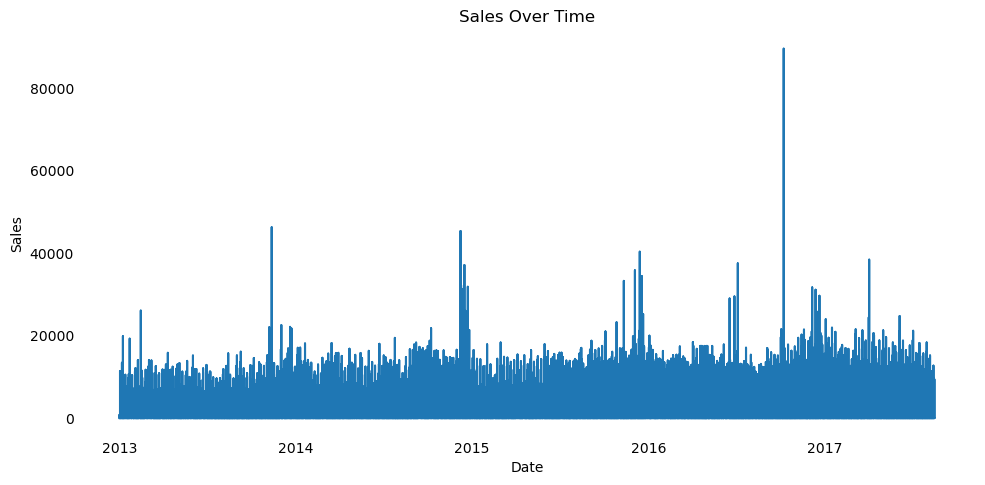

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_tick_params(length=0)  
ax.yaxis.set_tick_params(length=0)  

plt.show()

There is one more extreme outlier left in 2016. Let's investigate it further.

In [72]:
upper_threshold = 60000  

outlier_dates = df[df['sales'] > upper_threshold]['date'].unique()

print("Outliers detected between these dates:")
print(outlier_dates.min(), "to", outlier_dates.max())

Outliers detected between these dates:
2016-10-07 00:00:00 to 2016-10-07 00:00:00


The outliers lies in one particular day: 2016-10-07

Let's examine it further. 

In [73]:
specific_date = '2016-10-07'

# filtering the DataFrame for the specific date
df_filtered_part = df[(df['date'] == specific_date) & (df['sales'] > 20000)]

df_filtered_part


,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,oil_price,transactions,national_holiday,events,state_holiday,city_holiday,year,month,day,weekday
2453376,2016-10-07,39,meats,"89,576",0,cuenca,azuay,B,6,50,"1,295",False,False,False,False,2016,10,7,4


There is one extremely large sales number recorded in the meat products category, which stands out significantly from the usual data. This unusually high value is likely the result of an error, such as incorrect data entry or a reporting issue. Given its abnormality, it's reasonable to consider adjusting or removing this data point to avoid distorting the overall analysis.

One of the approaches would be substututing it with the median value. Let's find the median value for the month of October 2016.

In [74]:
store = 39  
product = 'meats'  
start_date = '2016-10-01'
end_date = '2016-10-30'  

monthly_data = df[(df['store_nbr'] == store) & (df['family'] == product) & 
                  (df['date'] >= start_date) & (df['date'] <= end_date)]

# calculating the median sales for this store and product in the specified month
median_sales = monthly_data['sales'].median()
print(median_sales)


175.09249499999999


Now let's replace the outlier with the median value. 

In [75]:
df.loc[(df['date'] == specific_date) & (df['sales'] > 20000), 'sales'] = median_sales

df_filtered_part = df[(df['date'] == specific_date) & (df['sales'] > 20000)]

df_filtered_part

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,oil_price,transactions,national_holiday,events,state_holiday,city_holiday,year,month,day,weekday


Let's verify the results one more time. 

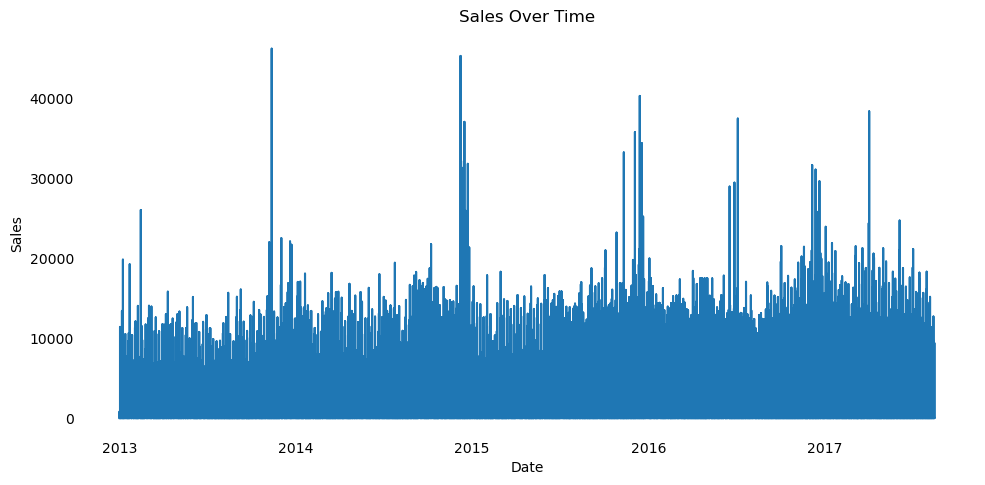

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_tick_params(length=0)  
ax.yaxis.set_tick_params(length=0)  

plt.show()

### Finding correlations <a id="correlation"></a>

Let's see if there are any correlation between sales and holidays. We can use Pearson correlation to establish that. 

In [77]:
correlation_national = df['sales'].corr(df['national_holiday'])
correlation_state = df['sales'].corr(df['state_holiday'])
correlation_city = df['sales'].corr(df['city_holiday'])

print("Correlation between Sales and National Holidays:", correlation_national)
print("Correlation between Sales and State Holidays:", correlation_state)
print("Correlation between Sales and City Holidays:", correlation_city)

Correlation between Sales and National Holidays: 0.011707212010244735
Correlation between Sales and State Holidays: -0.002159429174352437
Correlation between Sales and City Holidays: 0.0037890403533120923


All the correlation values are very close to zero, indicating that there is almost no linear relationship between sales and any of the holiday types (National, State, or City).

This suggests that holidays, whether national, state or city-specific, do not have a significant impact on sales in the dataset. The observed sales figures are largely independent of whether the day is a holiday or not.

#### Comparing sales trend with oil price

Let's see if there is any correlation between between theprice of oil and sales.

In [78]:
#importing oil dataset
oil = pd.read_csv("../data/oil.csv")

As we discovered above the missing values in oil dataset are exact weekend days. We have chosen interpolation approach to fill the missing values and should apply the same method again here.

In [79]:
oil['date'] = pd.to_datetime(oil['date'])
oil.set_index('date', inplace=True)

oil['dcoilwtico'] = oil['dcoilwtico'].interpolate(method='time')

In [80]:
oil.reset_index(inplace=True)

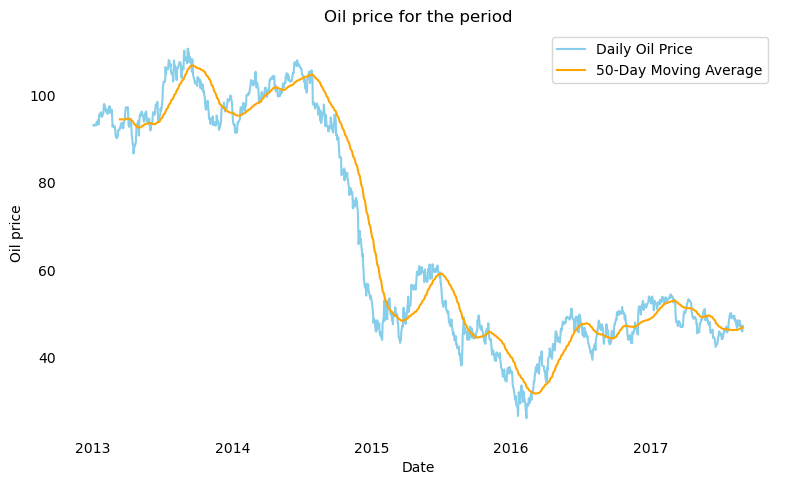

In [81]:
plt.figure(figsize=(8, 5))
plt.plot(oil['date'], oil['dcoilwtico'], label='Daily Oil Price', color='skyblue')
plt.plot(oil['date'], oil['dcoilwtico'].rolling(50).mean(), label='50-Day Moving Average', color='orange')
plt.xlabel('Date')
plt.ylabel('Oil price')
plt.title('Oil price for the period')
plt.legend() 

plt.tight_layout()
ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_major_locator(mdates.YearLocator())  # show ticks at yearly intervals
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.xaxis.set_tick_params(length=0)  
ax.yaxis.set_tick_params(length=0)

plt.show()

Let's plot the sales and oil price graphs against each other to see any correlations.

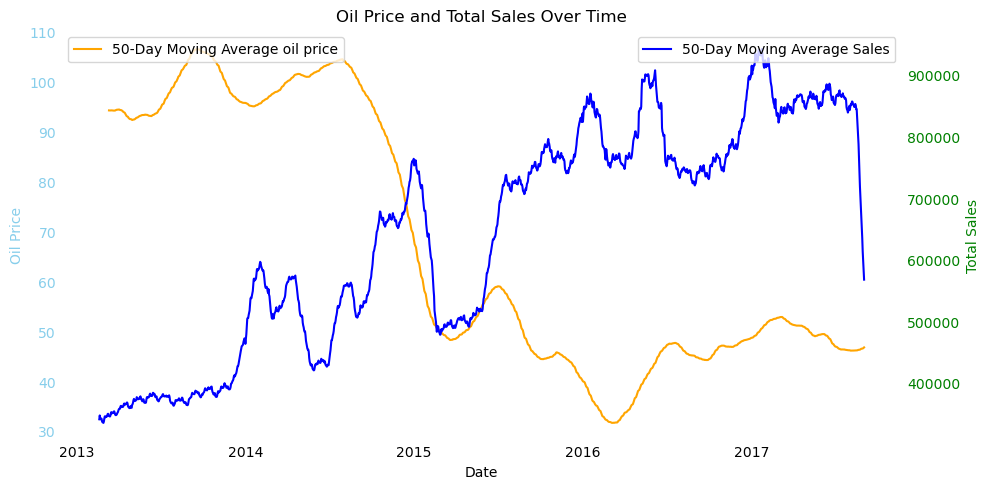

In [82]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# plotting the first dataset on the left y-axis
ax1.plot(oil['date'], oil['dcoilwtico'].rolling(50).mean(), label='50-Day Moving Average oil price', color='orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Oil Price', color='skyblue')
ax1.tick_params(axis='y', colors='skyblue')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.xaxis.set_major_locator(mdates.YearLocator())  
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_tick_params(length=0)
ax1.yaxis.set_tick_params(length=0)
ax1.legend(loc='upper left')

# creating a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(df_daily_total_sales['date'], df_daily_total_sales['sales'].rolling(50).mean(), label='50-Day Moving Average Sales', color='blue')
ax2.set_ylabel('Total Sales', color='green')
ax2.tick_params(axis='y', colors='green')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.xaxis.set_tick_params(length=0)
ax2.yaxis.set_tick_params(length=0)
ax2.legend(loc='upper right')

plt.title('Oil Price and Total Sales Over Time')

plt.tight_layout()
plt.show()


In [83]:
correlation = df_daily_total_sales['sales'].corr(oil['dcoilwtico'])
print(f"Correlation between sales and oil price: {correlation}")

Correlation between sales and oil price: -0.4892675660041095


We can see a negative correlation between oil price and total sales, as the price of oil drops the total sales grow. A correlation of -0.4893 between sales and oil price suggests that higher oil prices tend to be associated with lower sales, indicating an inverse relationship. There are several possible reasons for this negative correlation:
- Reduced Transportation Costs: Lower oil prices reduce transportation and distribution costs, leading to lower product prices and increased sales.
- Increased Disposable Income: Lower fuel costs leave consumers with more disposable income, boosting their ability to spend on other goods, thus increasing sales.
- Economic Stimulus: Falling oil prices may stimulate other sectors of the economy, improving consumer confidence and spending.
- Lower Inflation: Reduced oil prices can decrease inflationary pressures, increasing consumers' purchasing power and resulting in higher sales. 

#### Finding correlation between sales and promotions

In [84]:
df.reset_index(inplace=True)

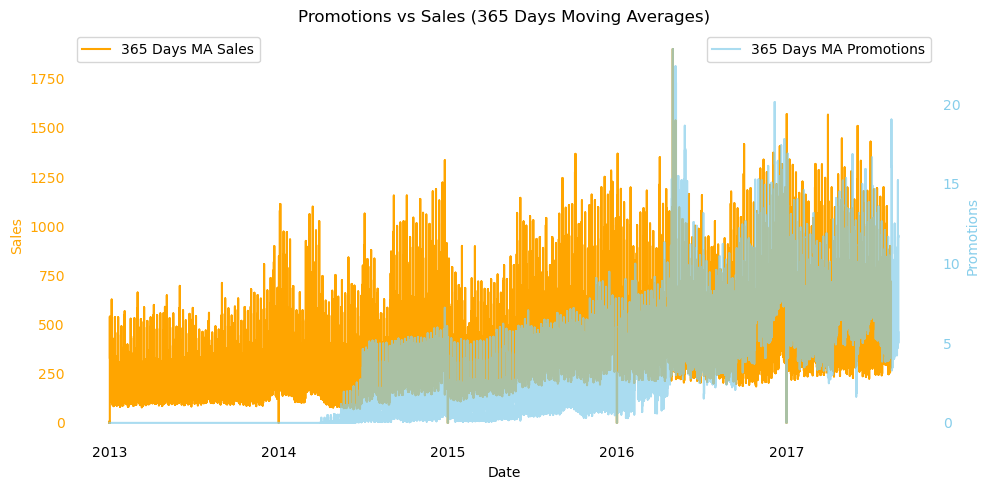

In [85]:
fig, ax1 = plt.subplots(figsize=(10, 5))
df['date'] = pd.to_datetime(df['date']) 

ax1.plot(df['date'], df['sales'].rolling(365).mean(), label = '365 Days MA Sales', color='orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='orange')
ax1.tick_params(axis='y', colors='orange')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.xaxis.set_major_locator(mdates.YearLocator())  # Show ticks at yearly intervals
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_tick_params(length=0)
ax1.yaxis.set_tick_params(length=0)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(df['date'], df['onpromotion'].rolling(365).mean(), label='365 Days MA Promotions', linestyle='-', color='skyblue', alpha = 0.7)
ax2.set_ylabel('Promotions', color='skyblue')
ax2.tick_params(axis='y', colors='skyblue')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.xaxis.set_tick_params(length=0)
ax2.yaxis.set_tick_params(length=0)
ax2.legend(loc='upper right')

plt.title('Promotions vs Sales (365 Days Moving Averages)')

plt.tight_layout()
plt.show()

There is a visual correlation between sales and promotions starting from 2nd quarter of 2014.

In [86]:
correlation = df['sales'].corr(df['onpromotion'])

print(f"Correlation between sales and promotions: {correlation}")

Correlation between sales and promotions: 0.42982158414932636


A correlation coefficient of 0.4298 between sales and promotions indicates a moderate positive linear relationship between the two variables.The positive sign of the correlation (0.4275) suggests that as the number of promotions increases, sales tend to increase as well. This indicates that promotions are generally effective in boosting sales.

A correlation of 0.4298 is considered a moderate correlation. It is not close to 1, which would indicate a strong, almost perfect positive linear relationship. It is far from 0, indicating that there is some degree of linear association between the two variables, but it's not extremely strong.

The correlation value suggests that while promotions do have a noticeable effect on sales, they are not the only factor influencing sales.

### Feature selection <a id="features"></a>

We have included all features in the database for the purpose of exploratory data analysis (EDA). Now, based on identified trends and anomalies we need to select the relevant features to train the model.

There is no correlation between the type of store or cluster and sales, so these columns can be deleted. Additionally, the state column can be removed. We have determined that there is no correlation between holidays and sales; however, we observed a drop in sales in early January and an increase towards the end of the year, indicating a slight dependency on the festive season. Therefore, we can remove regional or local holiday values, but we will keep national holidays. Lastly, the transactions column can also be removed.


In [87]:
# renaming some columns to shorter and clearer names for better readability
df.rename(columns={'family': 'products', 'onpromotion': 'promo', 'national_holiday': 'holiday'}, inplace=True)

In [88]:
columns_to_drop = ['state', 'type', 'cluster', 'transactions', 'state_holiday', 'city_holiday']
df_final = df.drop(columns = columns_to_drop)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036792 entries, 0 to 3036791
Data columns (total 14 columns):
 #   Column     Dtype         
---  ------     -----         
 0   index      int64         
 1   date       datetime64[ns]
 2   store_nbr  int64         
 3   products   object        
 4   sales      float64       
 5   promo      int64         
 6   city       object        
 7   oil_price  float64       
 8   holiday    bool          
 9   events     bool          
 10  year       int32         
 11  month      int32         
 12  day        int32         
 13  weekday    int32         
dtypes: bool(2), datetime64[ns](1), float64(2), int32(4), int64(3), object(2)
memory usage: 237.5+ MB


In [89]:
df_final.set_index('index', inplace=True)
df_final.head()

,date,store_nbr,products,sales,promo,city,oil_price,holiday,events,year,month,day,weekday
index,,,,,,,,,,,,,
0,2013-01-01,1,automotive,0,0,quito,93,True,False,2013,1,1,1
1,2013-01-01,1,baby_care,0,0,quito,93,True,False,2013,1,1,1
2,2013-01-01,1,beauty,0,0,quito,93,True,False,2013,1,1,1
3,2013-01-01,1,beverages,0,0,quito,93,True,False,2013,1,1,1
4,2013-01-01,1,books,0,0,quito,93,True,False,2013,1,1,1


In [90]:
df_final.to_csv('../data/train_post_eda.csv')

Splitting the set back into training and test sets.

In [91]:
df_final['date'] = pd.to_datetime(df_final['date'])

# splitting the dataset into two based on a specific date
split_date = '2017-08-16'

# dataset before the split date (less than the split date)
df = df_final[df_final['date'] < split_date]

# dataset after the split date (greater than or equal to the split date)
df_test = df_final[df_final['date'] >= split_date]

start_date = df['date'].min()
end_date = df['date'].max()

start_date_test = df_test['date'].min()
end_date_test = df_test['date'].max()

print("Start date:", start_date)
print("End date:", end_date)

print("Start date test set:", start_date_test)
print("End date test set:", end_date_test)

Start date: 2013-01-01 00:00:00
End date: 2017-08-15 00:00:00
Start date test set: 2017-08-16 00:00:00
End date test set: 2017-08-31 00:00:00


In [93]:
df.to_csv('../data/train_final.csv')
df_test.to_csv('../data/test_final.csv')

### Identified Trends and Anomalies: <a id="trends"></a>

- Sales drop during the first days of January, likely because most shops are closed, or customers tend to shop less.
- There is a general trend of increasing sales towards the end of the year, probably due to the festive season.
- Shops located in Quito contribute over 50% of total sales, followed by Guayaquil with roughly 12%.
- The most popular product types are grocery (32%), beverages (20%), and produce (11.5%).
- There is a clear negative correlation between oil prices and total sales. This trend is expected and could be due to increased disposable income, reduced transportation costs, or other economic factors.
- There was a significant increase in sales during the earthquake in Manabí province.
- A correlation of 0.4298 between sales and promotions suggests that promotions are moderately effective at increasing sales, but other factors likely influence sales as well. This positive correlation indicates that promotions do have a beneficial impact, but it's not the sole determinant of sales performance.
- There was an extreme outlier in October 2016 in the meat product category. This was probably due to an error.